In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

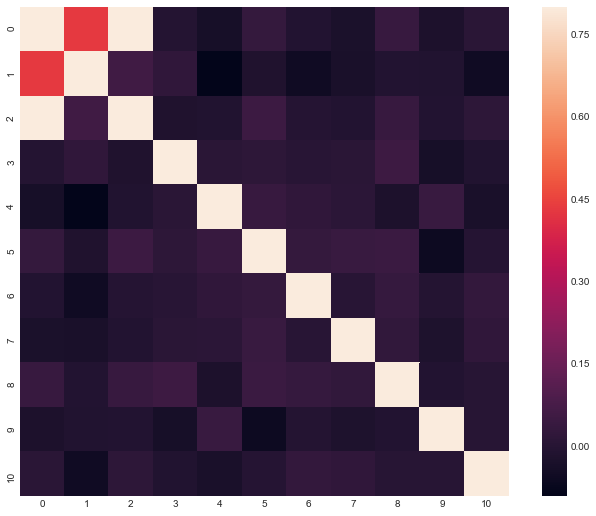

In [2]:
n = 1000 # Number of datapoints in outcome.
p = 10 # Number of features.
# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


R-squared regression: 0.849309553807


R-squared regression: 0.849309553807
R-squared PLSR: 0.849309501269


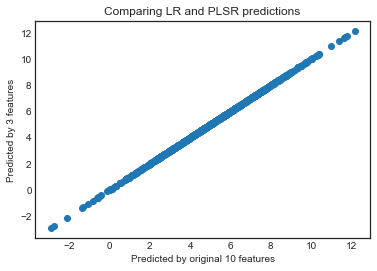

In [9]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls_3c = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls_3c.fit(X, y)

# Save predicted values.
Y_PLS_3c = pls_3c.predict(X)
print('R-squared regression:', regr.score(X, y))
print('R-squared PLSR:', pls_3c.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_3c) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.849309553807
R-squared PLSR: 0.849309553806


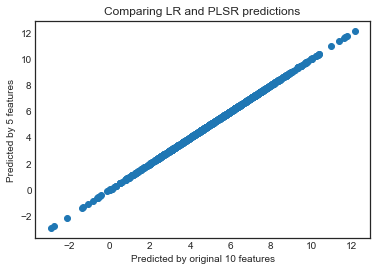

In [10]:
# Reduce feature space to 5 dimensions.
pls_5c = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls_5c.fit(X, y)

# Save predicted values.
Y_PLS_5c = pls_5c.predict(X)
print('R-squared regression:', regr.score(X, y))
print('R-squared PLSR:', pls_5c.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_5c) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.849309553807
R-squared PLSR: 0.849309553807


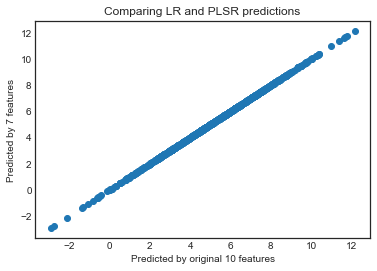

In [11]:
# Reduce feature space to 7 dimensions.
pls_7c = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
pls_7c.fit(X, y)

# Save predicted values.
Y_PLS_7c = pls_7c.predict(X)
print('R-squared regression:', regr.score(X, y))
print('R-squared PLSR:', pls_7c.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_7c) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 7 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.849309553807
R-squared PLSR: 0.849274882965


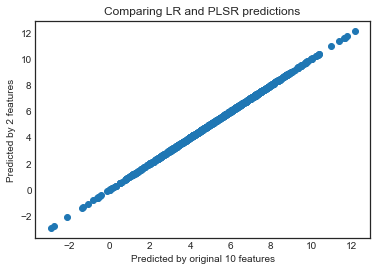

In [12]:
# Reduce feature space to 2 dimensions.
pls_2c = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls_2c.fit(X, y)

# Save predicted values.
Y_PLS_2c = pls_2c.predict(X)
print('R-squared regression:', regr.score(X, y))
print('R-squared PLSR:', pls_2c.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_2c) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')

plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 6 dimensions.
pls_6c = PLSRegression(n_components=6)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR: ' + str(pls_6c.fit(X_train, y_train).score(X_test, y_test)))
pls_6c.fit(X_train, y_train)

# Save predicted values.
Y_PLS_6c = pls_6c.predict(X_test)
print('R-squared regression:', regr.score(X, y))
#print('', pls_6c.score(X_test, y_test))


With 20% Holdout, R-squared PLSR: 0.834366967541
R-squared regression: 0.849309553807


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 3 dimensions.
pls_3c = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR: ' + str(pls_3c.fit(X_train, y_train).score(X_test, y_test)))
pls_3c.fit(X_train, y_train)

# Save predicted values.
Y_PLS_3c = pls_3c.predict(X_test)
print('R-squared regression:', regr.score(X, y))
#print('', pls_6c.score(X_test, y_test))


With 20% Holdout, R-squared PLSR: 0.834370706975
R-squared regression: 0.849309553807


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 7 dimensions.
pls_7c = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR: ' + str(pls_7c.fit(X_train, y_train).score(X_test, y_test)))
pls_7c.fit(X_train, y_train)

# Save predicted values.
Y_PLS_7c = pls_7c.predict(X_test)
print('R-squared regression:', regr.score(X, y))
#print('', pls_6c.score(X_test, y_test))


With 20% Holdout, R-squared PLSR: 0.834366961831
R-squared regression: 0.849309553807


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 8 dimensions.
pls_8c = PLSRegression(n_components=8)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR: ' + str(pls_8c.fit(X_train, y_train).score(X_test, y_test)))
pls_8c.fit(X_train, y_train)

# Save predicted values.
Y_PLS_8c = pls_8c.predict(X_test)
print('R-squared regression:', regr.score(X, y))


With 20% Holdout, R-squared PLSR: 0.83436696168
R-squared regression: 0.849309553807


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 5 dimensions.
pls_5c = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR: ' + str(pls_5c.fit(X_train, y_train).score(X_test, y_test)))
pls_5c.fit(X_train, y_train)

# Save predicted values.
Y_PLS_5c = pls_5c.predict(X_test)
print('R-squared regression:', regr.score(X, y))


With 20% Holdout, R-squared PLSR: 0.834366760846
R-squared regression: 0.849309553807


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 2 dimensions.
pls_2c = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR on test : ' + str(pls_2c.fit(X_train, y_train).score(X_test, y_test)))
print('With 20% Holdout, R-squared PLSR on training dataset : ' + str(pls_2c.fit(X_train, y_train).score(X_train, y_train)))
pls_2c.fit(X_train, y_train)

# Save predicted values.
Y_PLS_2c = pls_2c.predict(X_test)
print('R-squared regression:', regr.score(X, y))


With 20% Holdout, R-squared PLSR on test : 0.834514615197
With 20% Holdout, R-squared PLSR on training dataset : 0.851861211713
R-squared regression: 0.849309553807


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 3 dimensions.
pls_3c = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR on test : ' + str(pls_3c.fit(X_train, y_train).score(X_test, y_test)))
print('With 20% Holdout, R-squared PLSR on training dataset : ' + str(pls_3c.fit(X_train, y_train).score(X_train, y_train)))


With 20% Holdout, R-squared PLSR on test : 0.834370706975
With 20% Holdout, R-squared PLSR on training dataset : 0.851885661222


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 5 dimensions.
pls_5c = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR on test : ' + str(pls_5c.fit(X_train, y_train).score(X_test, y_test)))
print('With 20% Holdout, R-squared PLSR on training dataset : ' + str(pls_5c.fit(X_train, y_train).score(X_train, y_train)))


With 20% Holdout, R-squared PLSR on test : 0.834366760846
With 20% Holdout, R-squared PLSR on training dataset : 0.851885695387


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# Reduce feature space to 7 dimensions.
pls_7c = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
print('With 20% Holdout, R-squared PLSR on test : ' + str(pls_7c.fit(X_train, y_train).score(X_test, y_test)))
print('With 20% Holdout, R-squared PLSR on training dataset : ' + str(pls_7c.fit(X_train, y_train).score(X_train, y_train)))


With 20% Holdout, R-squared PLSR on test : 0.834366961831
With 20% Holdout, R-squared PLSR on training dataset : 0.851885695389
